# SyriaTel Customer Churn Prediction. 

## Overview 

SyriaTel is a mobile network provider in Syria. This project aims to provide insights into the determinant factors of churning as well as predict future cases of churn using different models in order to provide adequate recommendations to the company. This would in turn help to retain customers / product consumers who would otherwise churn. This would help improve the health of the business while assisting in the forecasting of future revenue for the business. Building a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, would then provide information on patterns that may exist and shed light on the problem.


## Business and Data Understanding 

#### Business Understanding 

The project uses [SyriaTel Customer Churn](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) dataset from kaggle. The dataset is going to be used to determine features that are likely very related to the possibility of users to stop or cancel using the services of SyriaTel comunications. In examining these features, it is possible to identify these features and use them to predict future churn possibilities.

In [374]:
# Import the necessary modules
# Modules dealing with data and visualizations
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels as statsmd

# Modules for modelling
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

>> * **Loading and viewing the dataset**

In [375]:
# Loading the datset
df = pd.read_csv('Data/churndata.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Data Understanding

The dataset contains 3,333 rows and 21 columns. The columns contain features associated with call information such as number of minutes for calls, time of day the calls were made, the type of call, that is, international of to customer service etcetra. The target feature is the churn in the churn column which shows which consumers stopped using the services as well as which consumers continued using the service. The dataset is also imbalanced as will be seen later and this will need to be addressed as well

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [377]:
# Descriptive Statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [378]:
# Checking the new shape of the data
def data_shape(data):
    return (f"The data has a shape of {data.shape} with {data.shape[0]} rows and {data.shape[1]} columns")

data_shape(df)

'The data has a shape of (3333, 21) with 3333 rows and 21 columns'

> * From the above cells we can see that the dataset, there are no null values. This can be seen by the constant count in the description as well as non-null counts in the information about the dataset but this is confirmed in the next section. 
> * It also identifies 1 boolean column, 8 float and 8 integer columns and finally 4 object type columns. This means that there will be need to convert 5 columns for use including the target feature column. 

#### Data Preparation

> * In this section, the data is prepared before it is taken for modelling. This is where duplicated and missing values are checked for. From the information section, it is easy so see that there are no null values. Data type conversions will also be done here to prepare for modelling. This can be done through binary encoding, one hot encoding or dropping them if they are not useful.
> * This section also checks for multicollinearity as well as distribution of the dataset. For example normality of the distributions. There will be a need for resampling methods given the imbalance of the dataset.

##### EDA

* _This section explores the data and analyses the relationship between features in the dataset_

In [379]:
# Creating a function to view columns
def col_info(data):
    
    "This is a simple function to help describe the column data types"
    
    print('col_names: \n', data.columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('num_cols: \n', data.select_dtypes(int).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('cat_cols: \n', data.select_dtypes(object).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('boolean_cols: ', data.select_dtypes(bool).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('float_cols: \n', data.select_dtypes(float).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('The shape: ', data.shape)
    print('=====================================================================================')
    print('=====================================================================================')
    print(f"There are {len(data.select_dtypes(int).columns)} numeric type columns, {len(data.select_dtypes(object).columns)} object type columns\
    {len(data.select_dtypes(bool).columns)} boolean columns and {len(data.select_dtypes(float).columns)} float type columns out of {df.shape[1]}")
    

In [380]:
# Checking the columns according to datatypes
col_info(df) 

col_names: 
 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
num_cols: 
 Index(['account length', 'area code', 'number vmail messages',
       'total day calls', 'total eve calls', 'total night calls',
       'total intl calls', 'customer service calls'],
      dtype='object')
cat_cols: 
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')
boolean_cols:  Index(['churn'], dtype='object')
float_cols: 
 Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total ni

In [381]:
# Chreating a function for checking missing and duplicated values
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    
    n_missing = data.isna().sum().sum()
    n_duplicated = data.duplicated().sum()
    return (f"There are '{n_missing}' missing values and '{n_duplicated}' duplicated values in the dataset")

In [382]:
# veiwing the number of missing and duplicated values
cleaning(df)

"There are '0' missing values and '0' duplicated values in the dataset"

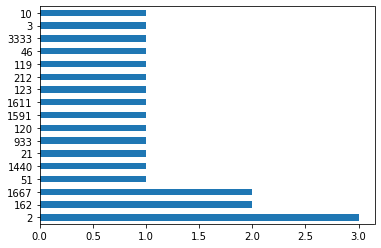

In [383]:
# Visualizing unique entries
df.nunique().value_counts().plot.barh();


> * The above cell shows the number of unique entries and is able to show the columns with a possibility of being categorical as well as those with very many unique entries.
>
> * I will first do univariate analysis to check the the individual distributions for the features in the dataset and check for any underlying pattern.

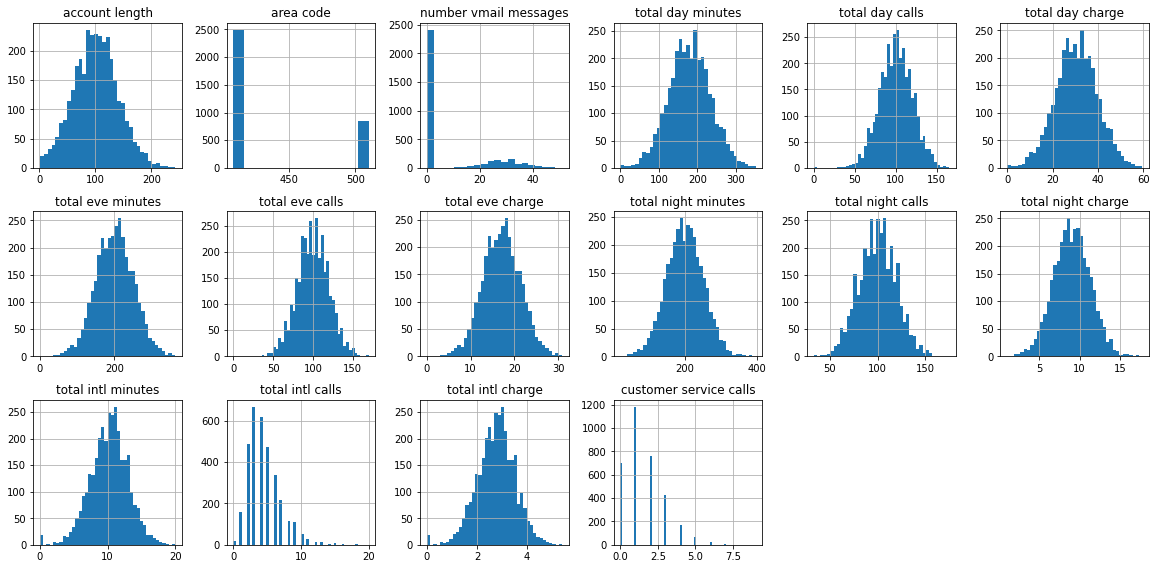

In [384]:
# Check the distribution of the data
df.hist(bins = 'auto', layout = (6,6), figsize = (20,20))
plt.show()

> * From the cell above it is visible that there are categorical features well as numerical features that seem to be normally distributed. Features such as account length and those calculating totals such as total day calls and total international calls or total night charges. 
>
> * There are also categorical features such as area code or voice mail messages. These features can be binary encoded or one hot encoded in order to work with them as numerical features. 

In [385]:
# Get a distribution of the target variable
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64


      The distribution for churn is:
churn
False    2850
True      483
Name: count, dtype: int64
      


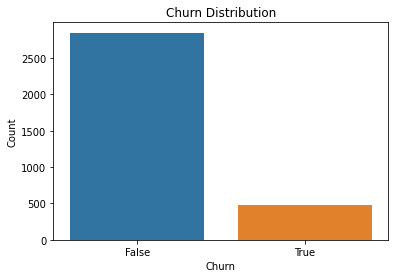

In [386]:
# Viewing the distribution of churn
print(f"""
      The distribution for churn is:\n{df['churn'].value_counts()}
      """)

sns.countplot(data=df, x='churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

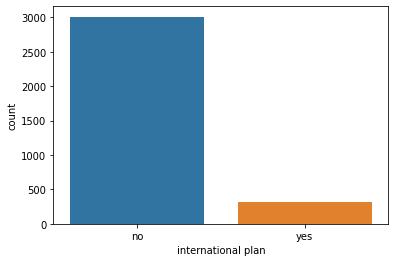

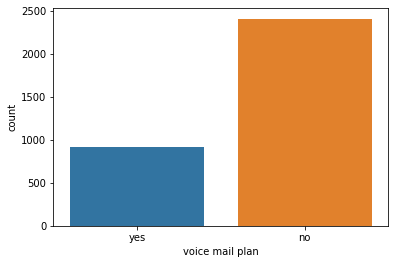

In [387]:
# Checking the distribution of data according to international plan
sns.countplot(data=df, x='international plan')
plt.show()

# Checking the distribution of data according to voice mail plan
sns.countplot(data=df, x='voice mail plan')
plt.show()

> * From the distributions above, we can see that the False values far exceed the True values for the Churn feature. This is also visible in the international plan with no values being more than the yes values. It is a bit different for the voice mail plan with no values being more that the yes values.
>
> * Having churn as the target column, and viewing it's individual distribution, as well as the distribution for international plan and voice mail plan; we can see a sense of imbalance in the dataset. The above shows that the dataset is imbalanced because one set of values exceed the other by a lot and would need to be resampled to prevent errors in the model.
>
> * The use of Synthetic Minority Oversampling Technique(SMOTE) would be able to mitigate this caveat as this is best done before modeling in order to get accurate predictions and evaluation.

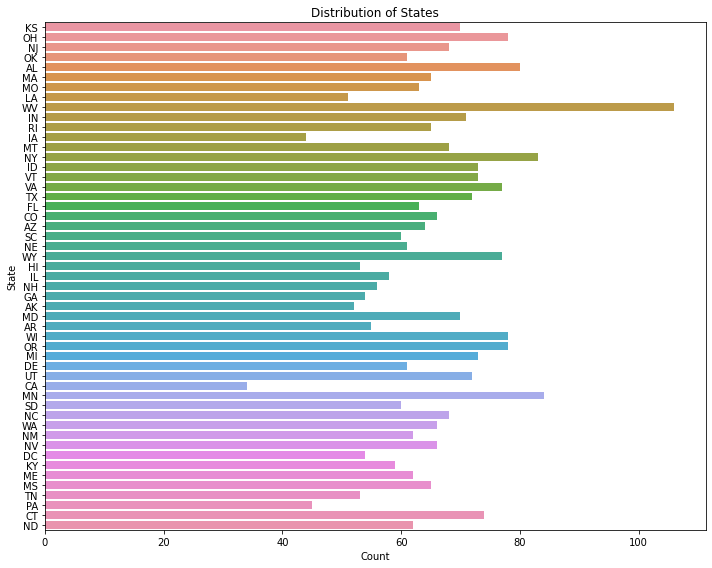

In [388]:
# Checkng distribution by State
plt.figure(figsize=(10, 8))

# Plotting to view distribution
sns.countplot(data=df, y='state')
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of States')
plt.tight_layout()

plt.show()

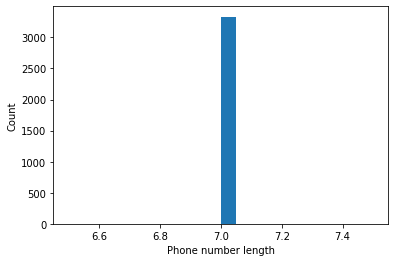

In [389]:
# Extracting phone-number for distribution viewing
phone_numbers = df['phone number']

# Removing non-numeric characters
phone_numbers = phone_numbers.str.replace(r'\D', '', regex=True)

# Plotting to view distribution
plt.hist(phone_numbers.str.len(), bins=20)
plt.xlabel('Phone number length')
plt.ylabel('Count')
plt.show()

* > From the distribution of state above, we can see that the distribution counts range between 0 and 110. For phone number length, all entries have the exact same number length. These two columns may not give us much information or may not be important in our model as they predominantly determine personal information of the consumer/customer. THey can thus be dropped.

In [390]:
df = df.drop(["state", "phone number"], axis=1)

data_shape(df)

'The data has a shape of (3333, 19) with 3333 rows and 19 columns'

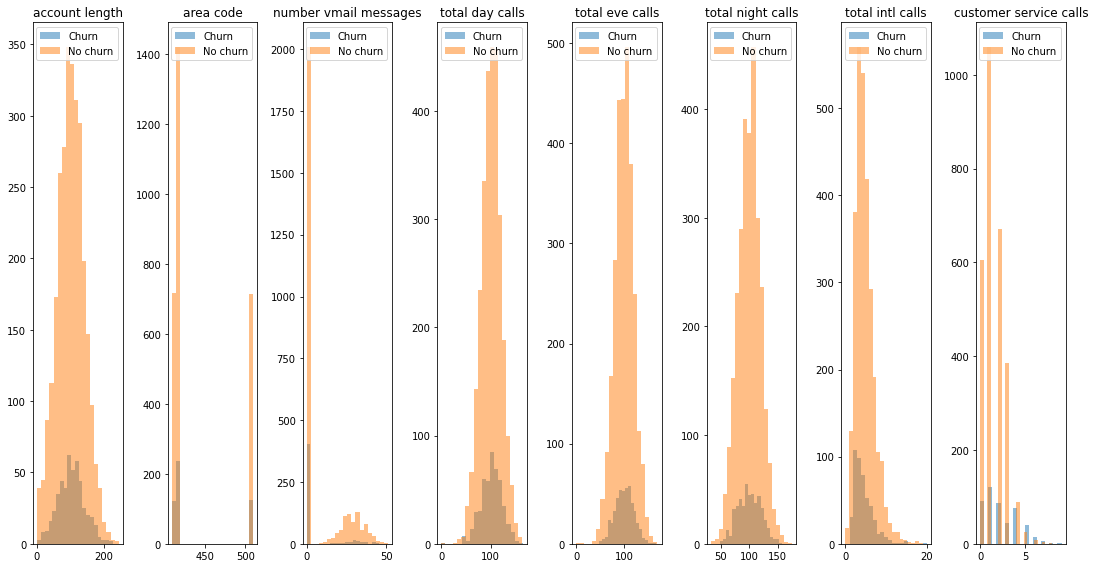

In [391]:
# Doing Bivariate analysis with respect to churn
fig, axes = plt.subplots(nrows=1, ncols=len(df.select_dtypes(int).columns), figsize=(15, 8)) 
for i, col in enumerate(df.select_dtypes(int).columns):
    data_churn = df[df["churn"] == 1][col]
    data_no_churn = df[df["churn"] == 0][col]
    axes[i].hist(data_churn, alpha=0.5, label="Churn", bins=20)
    axes[i].hist(data_no_churn, alpha=0.5, label="No churn", bins=20)
    axes[i].set_title(col)
    axes[i].legend()

plt.tight_layout()
plt.show()

> * The above cell shows bivariate analysis with relation to churn.These are the features that have a form of relationship with churn as the deeper orange colors represent the overlaying with the blue. AN example is the customer service calls where past 5, there is an increased churn rate than no churn rate. This is not clearly observed and will be better to use another form of visualization
>
> * These and other features are what the project will attempt to predict and determine the overall likelihood of customers churning.
>
> * It is also possible to view this relationship using boxplots to see clearly the churn or no churn rates for columns. I will use columns that represent each facet of the relationship. Columns with high correlation such as total minutes and total charges will only feature one.

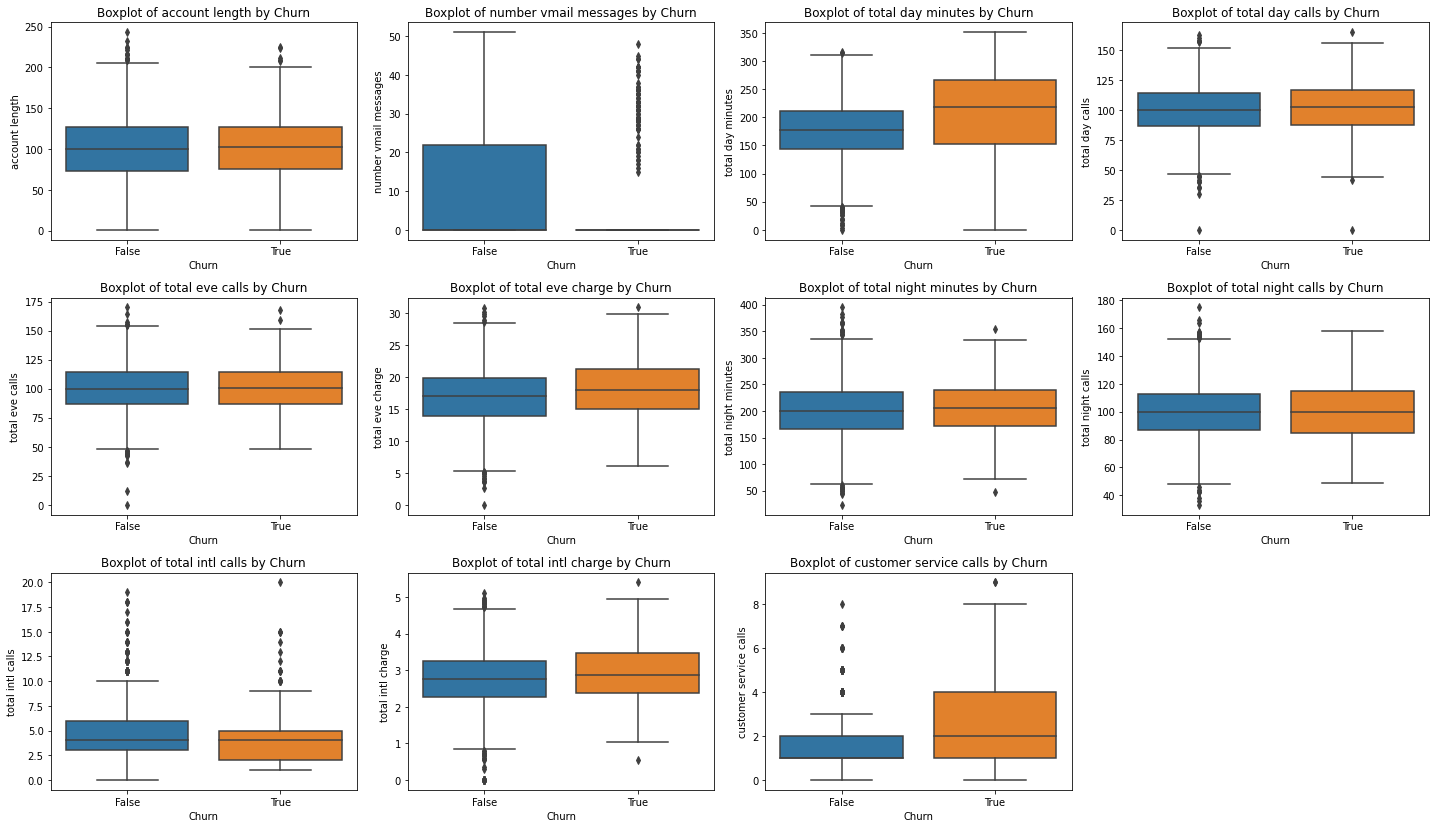

In [392]:
# Viewing the bivariate relationship using boxplots
numerical_cols = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total intl calls', 'total intl charge', 'customer service calls']

nrows = 4  # Number of rows in the subplot grid
ncols = 4  # Number of columns in the subplot grid

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='churn', y=col, data=df, ax=axes[i])
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Boxplot of {col} by Churn')

# Remove empty subplots if the number of columns is not divisible by ncols
if len(numerical_cols) < nrows * ncols:
    for j in range(len(numerical_cols), nrows * ncols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

> * It is more evident using boxplots as it is visible that some features have higher churn possibilities. Features such as total day minutes, total eve charge and international charge and the most evident customer service calls. These features show a gretaer tendency towards churn than the rest.
>
> * These are features that the business would need to concentrate on and improve in order to reduce the churn ratesassociated from these features.

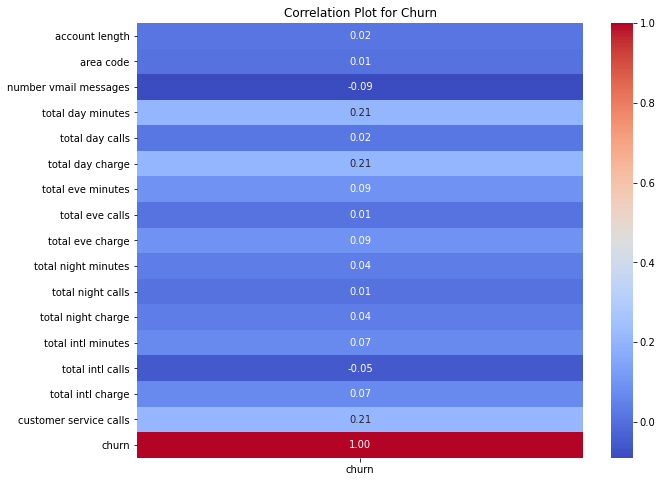

In [393]:
# Checking for correlation with the churn variable
churn_corr = df.corr(numeric_only=True)['churn']

# Visualizing
plt.figure(figsize=(10, 8))
sns.heatmap(churn_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot for Churn')
plt.show()

* > From the visualization above, it is visible that customer service calls, total day minutes and total day charge have the highest correlation to churn with a value of 0.21.

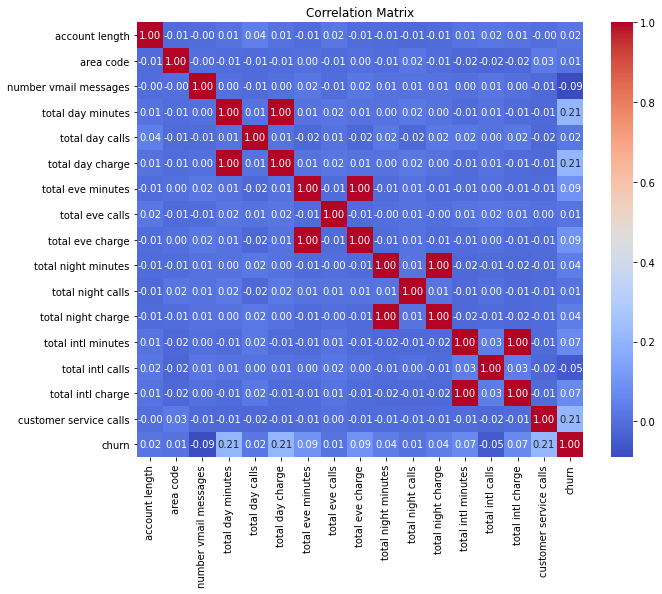

In [394]:
# Checking the correlation in the datset using correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* > The correlation matrix shows the same features that were highly correlated to churn, with values of 0.21. It also shows that the minutes and the charges columns/features are highly correlated and may lead to multicollinearity. It would be best to drop these columns to prevent redundancy. 

In [395]:
# Dropping the highly correlated columns
df = df.drop(["total day minutes", "total eve minutes", "total night minutes", "total intl minutes"], axis=1)

data_shape(df)

'The data has a shape of (3333, 15) with 3333 rows and 15 columns'

* > The next step would be to check for outliers in the dataset.

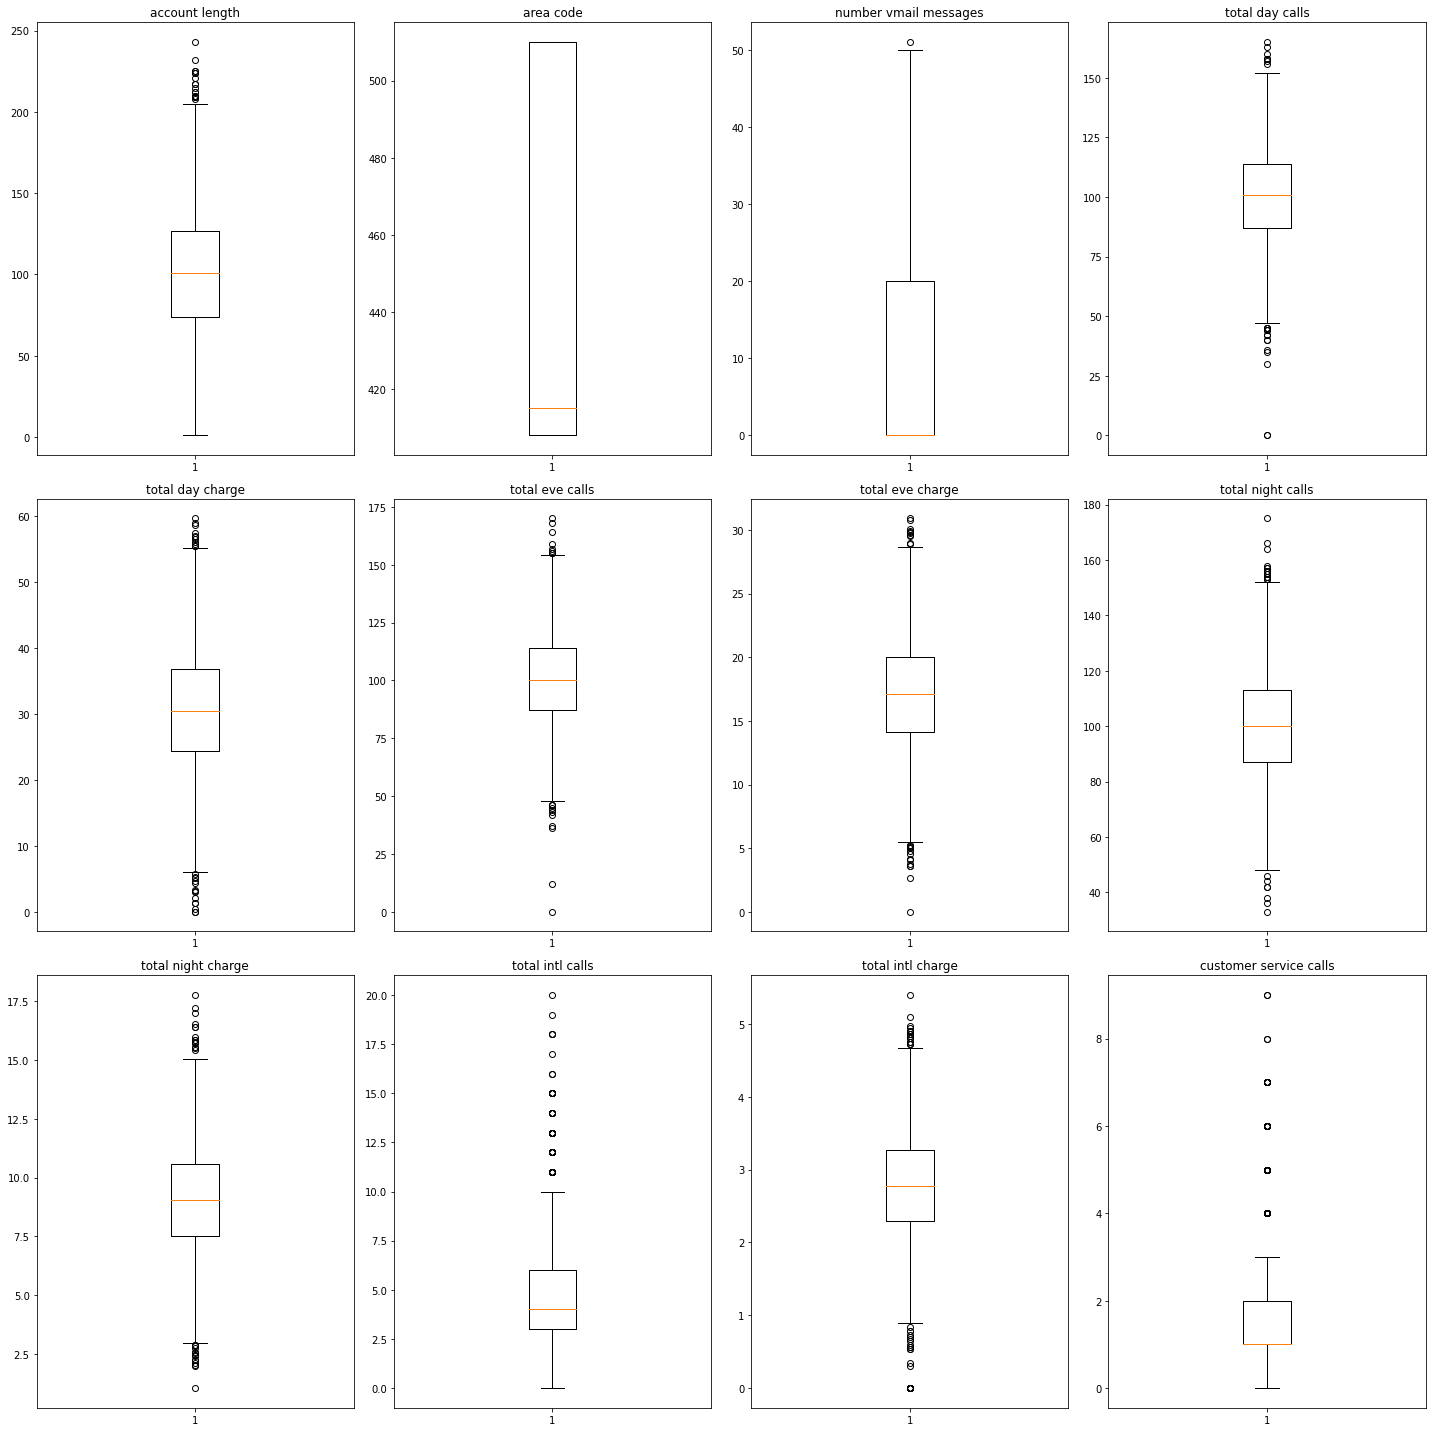

In [396]:
#Checking for outliers
numerical_cols = df.select_dtypes(include="number")

# Create a figure and subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 20))

# Plot the boxplots
for ax, col in zip(axes.ravel(), numerical_cols.columns):
    ax.boxplot(df[col].astype(float))
    ax.set_title(col)

# Tighten the layout
plt.tight_layout()

# Show the figure
plt.show()

* > These few feature visualizations show that there are a number of outlier values that may need to be dropped. This would be very necessary for regression problems but may not be necessary for a classification problem as we are dealing with probabilities and thus outliers would not really affect out models much and would thus not require dropping

* > The next step is for preparing the dataset for modelling. It is best to deal with numeric categoricals rather than stringified categoricals. The target column can be one hot encoded or binary encoded as well as other categorical features such as voice mail plan and international plan. This will help when doing the classification of the model

In [397]:
# Binary Encoding the Target Column
df['churn'] = df['churn'].replace({True: 1, False: 0}).astype(int)

# One-hot-encoding Area Code Column
# Area code
df = pd.get_dummies(df, columns=['area code'], drop_first=True)

# Binary-encoding the other categorical columns
# Voicemail
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# International Plan
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})


In [398]:
print("Relationship between account length and churn:")
print(df.groupby("churn")["account length"].describe())

Relationship between account length and churn:
        count        mean       std  min   25%    50%    75%    max
churn                                                              
0      2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0
1       483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0


In [399]:
# Viewing the data and its shape before modelling
print(data_shape(df))
df.head()

The data has a shape of (3333, 16) with 3333 rows and 16 columns


,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,area code_415,area code_510
0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,True,False
1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,True,False
2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,True,False
3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,False,False
4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,True,False


## Modeling

##### Logistic Regression 

* > For the baseline model, I am going to use logistic regression which will be used as a yardstick measure for the rest of the models. The models that follow are Decision Tree, KNN and Random Forest
>
* > The dataset is split into trainning set and testing set and will then be resampled using Synthetic Minority Oversampling Technique to solve for imbalance of the dataset.

In [400]:
# Determine the features(X) and target feature(y)
X = df.drop('churn', axis=1)
y = df['churn']

# Split the data into trainning set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=132)


In [401]:
# Using Synthetic Minority Oversampling Technique(SMOTE) to solve imbalance issues
sm = SMOTE()

X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Checking the shapes before and the shape after SMOTE
print("X_train Shape before oversampling: ", X_train.shape)
print("X_train Shape after oversampling: ", X_train_resampled.shape)
print("\n")
print("y_train Shape before oversampling: ", y_train.shape)
print("y_train Shape after oversampling: ", y_train_resampled.shape)

print("\n")
print(f"y_train Value Counts before oversampling: \n{pd.Series(y_train).value_counts()}")
print("\n")
print(f"y_train Value Counts after oversampling: \n{pd.Series(y_train_resampled).value_counts()}")

X_train Shape before oversampling:  (2333, 15)
X_train Shape after oversampling:  (4014, 15)


y_train Shape before oversampling:  (2333,)
y_train Shape after oversampling:  (4014,)


y_train Value Counts before oversampling: 
churn
0    2007
1     326
Name: count, dtype: int64


y_train Value Counts after oversampling: 
churn
0    2007
1    2007
Name: count, dtype: int64


* > The features in X are then scaled in order to bring the values between 0 and 1 to improve modeling.
>
* > This has been done using the Standard Scaler. It is also prudent to note that the training set if scaled using the resampled data and not the original set as compared to the test set

In [402]:
# Scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

* > In order to prevent repetition(D.R.Y code) and for neatness, I have created a function for modeling and for displaying confusion matrices from estimators and predictors in that order

In [403]:
# Creating a function for modeling
def modeling(model):
    
    "A simple function that is used to fit, predict and score metrics of a given model"
        
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resampled
    y2 = y_test
    
    base_cv = cross_val_score(model, X_train_scaled, y_train_resampled)
    
    fitting = model.fit(X1,y1)
    predicting = model.predict(X2)
    scoring = model.score(X2, y2)
    model_cv = cross_val_score(model, X1, y1, cv=6)
    model_report = classification_report(y2, predicting)
    model_roc_auc = roc_auc_score(y2, predicting)
    
    print("Score:")
    print("\t",scoring)
    print("\nCross validation:")
    print("\t",model_cv)
    print("\nClass report:")
    print(model_report)
    print("\nROC_AUC:")
    print("\t",model_roc_auc)

In [404]:
# Creating a function for displaying Confusion Matrix
def conf_matrix(model):
    
    "A simple function to display a Confusion Matrix for a model estimator and its prediction"
    
    X1 = X_train_scaled
    X2 = X_test_scaled
    y1 = y_train_resampled
    y2 = y_test
    
    predicting = model.predict(X2)
    
    # Estimator confusion matrix
    dis_estimator = ConfusionMatrixDisplay.from_estimator(model, X1, y1)
    
    # Predictor confusion matrix
    dis_predictor = ConfusionMatrixDisplay.from_predictions(y2, predicting)
    
    return dis_estimator, dis_predictor

* >> The first model to be tested in the Logistic Regression model


In [405]:
# Getting results from the Logistic Regression model
base_model = LogisticRegression(random_state=132)

modeling(base_model)

Score:
	 0.705

Cross validation:
	 [0.68310912 0.76233184 0.75037369 0.77279522 0.76083707 0.75784753]

Class report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       843
           1       0.30      0.64      0.40       157

    accuracy                           0.70      1000
   macro avg       0.60      0.68      0.60      1000
weighted avg       0.82      0.70      0.74      1000


ROC_AUC:
	 0.6773088227516225


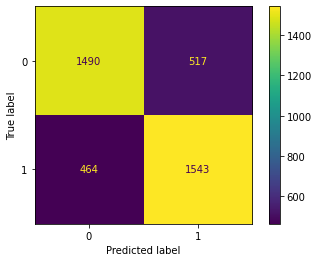

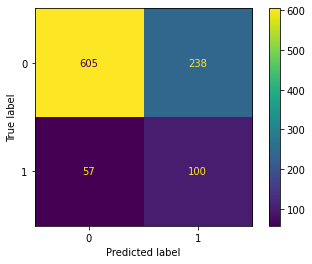

In [406]:
# Viewing the Confusion Matrices from estimators and predictors
conf_matrix(base_model);

##### Decision Tree Classifier

In [407]:
# Fitting and Predicting using Decision Trees
tree = DecisionTreeClassifier(random_state=132, max_depth=5)

modeling(tree)

Score:
	 0.844

Cross validation:
	 [0.7877429  0.79820628 0.7922272  0.80568012 0.80568012 0.81763827]

Class report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       843
           1       0.50      0.56      0.53       157

    accuracy                           0.84      1000
   macro avg       0.71      0.73      0.72      1000
weighted avg       0.85      0.84      0.85      1000


ROC_AUC:
	 0.7286533535825191


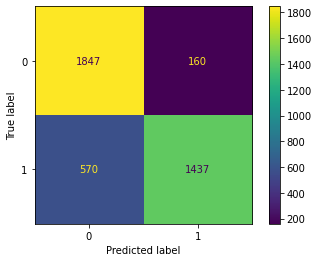

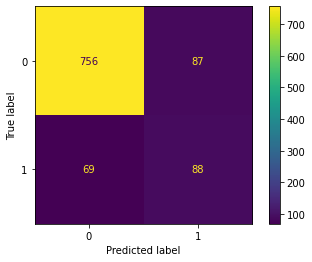

In [408]:
# Displaying confusion matrices from estimators and predictors
conf_matrix(tree);

In [409]:
# Creating the pipe parameter
pipe = Pipeline([('mms', MinMaxScaler()),
                 ('tree', DecisionTreeClassifier(random_state=132))])

# Creating the grid parameter
grid = [{'tree__max_depth': [None, 3, 5, 8], 
         'tree__min_samples_split': [4, 9]}]


# Creating the grid, with a "pipe" estimator
tree_gs = GridSearchCV(estimator=pipe, 
                          param_grid=grid, 
                          scoring='recall', 
                          cv=7)

In [410]:
# Viewing the tuned model from a decision tree
modeling(tree_gs)

Score:
	 0.6751592356687898

Cross validation:
	 [0.80239521 0.84131737 0.86826347 0.87164179 0.86268657 0.85671642]

Class report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       843
           1       0.41      0.68      0.51       157

    accuracy                           0.80      1000
   macro avg       0.67      0.75      0.69      1000
weighted avg       0.85      0.80      0.82      1000


ROC_AUC:
	 0.7486116463041458


##### KNN Model

In [411]:
# Fitting and Predicting using KNN
knn = KNeighborsClassifier(n_neighbors=4)

modeling(knn)

Score:
	 0.783

Cross validation:
	 [0.83258595 0.88938714 0.86547085 0.91180867 0.88938714 0.87593423]

Class report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       843
           1       0.35      0.46      0.40       157

    accuracy                           0.78      1000
   macro avg       0.62      0.65      0.63      1000
weighted avg       0.81      0.78      0.79      1000


ROC_AUC:
	 0.6535991416763002


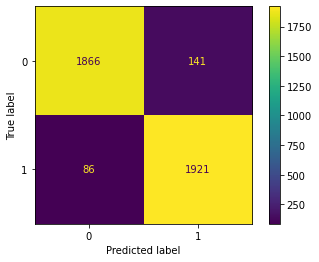

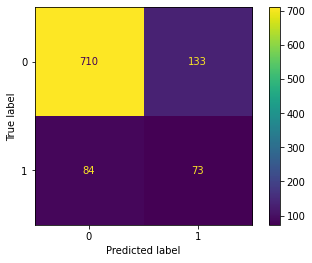

In [412]:
# Displaying confusion matrices from estimators and predictors
conf_matrix(knn);

##### Random Forest

In [413]:
# Fitting and Predicting using Random Forest
clf = RandomForestClassifier(n_estimators=4, random_state=132)

modeling(clf)

Score:
	 0.848

Cross validation:
	 [0.81315396 0.86248132 0.87144993 0.88041854 0.85650224 0.86995516]

Class report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       843
           1       0.52      0.46      0.49       157

    accuracy                           0.85      1000
   macro avg       0.71      0.69      0.70      1000
weighted avg       0.84      0.85      0.84      1000


ROC_AUC:
	 0.6921519293394082


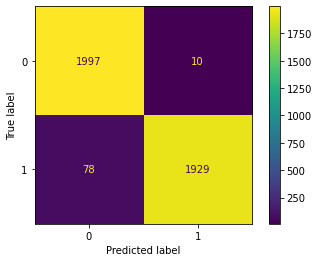

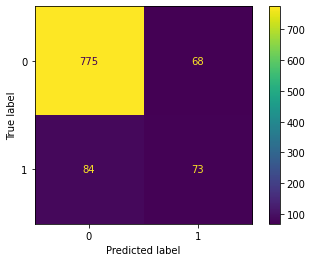

In [414]:
# Displaying confusion matrices from estimators and predictors
conf_matrix(clf);

**Feature Importance**

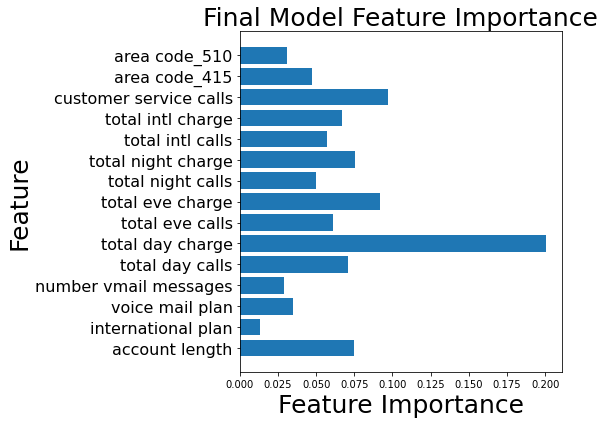

In [415]:
# Checking fro the most important features
def plot_features_importances(model):
    n_features = X_test.shape[1]
    plt.figure(figsize=(8,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_test.columns.values, fontsize = 16)
    plt.xlabel('Feature Importance', fontsize = 25)
    plt.ylabel('Feature', fontsize = 25)
    plt.title('Final Model Feature Importance', fontsize = 25)
    plt.tight_layout()
    
plot_features_importances(clf)

>> The features with the highest importance is total daily charge followed by customer service calls. This shows the priority importance of features that the company should focus on

## Evaluation & Conclusion

>> In this section, I am going to evaluate the results from the models using recall. This is because for a churn problem, the SyriaTel company would benefit more from mitigating False Negatives and increase False Positives. This reduces the chances of labelling a customer who is likely to churn as one who will not churn. 
>> It would be beneficial to label customers who would not churn as likely to churn in order to improve business health.

In [416]:
# Creating a function for viewing results
def results(model):

    " A simple function to view recall results for a given model"

    X2 = X_test_scaled
    y2 = y_test
    
    y2_pred = model.predict(X2)
    
    model_recall = recall_score(y2, y2_pred)
    return model_recall